In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <b>Introduction</b>
*  project dataset: open dataset
*  source: <a> href="https://www.kaggle.com/ahmettezcantekin/beginner-datasets "</a>
*  Objectives: Explore the data (EDA), visualize the data, identify and gain new useful feature variable, prepare and clean the data li
*  analysis will be explained in bahasa

<b>*Created by: Rizki Yoga Marsyamni*</b>




## Load The dataset: "Insurance":

In [2]:
data="Data/insurance.csv"
df= pd.read_csv(data)
df1=df
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# <b>EDA</b>

In [3]:
cut_points = [18,25,35,45,55,65]
age_label = ["remaja akhir", "dewasa awal", "dewasa akhir", "lansia awal", "lansia akhir"] 

#implementasi label tersebut dengan membuat kolom baru bernama age_label
df1['age_group'] = pd.cut(df1['age'], bins=cut_points, labels=age_label, include_lowest=True)


In [4]:
cut_points = [0, 18.5, 22.9, 29.9, 100 ]
bmi_label = ["kurang","normal","berlebih", "obesitas" ]

#implementasi label tersebut dengan membuat kolom baru bernama age_label
df1['bmi_group'] = pd.cut(df1['bmi'], bins=cut_points,labels=bmi_label, include_lowest=True)


In [5]:
df1.sample(3)

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
951,51,male,42.90,2,yes,southeast,47462.8940,lansia awal,obesitas
1069,54,female,31.90,1,no,southeast,10928.8490,lansia awal,obesitas
993,38,male,28.27,1,no,southeast,5484.4673,dewasa akhir,berlebih


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1338 non-null   int64   
 1   sex        1338 non-null   object  
 2   bmi        1338 non-null   float64 
 3   children   1338 non-null   int64   
 4   smoker     1338 non-null   object  
 5   region     1338 non-null   object  
 6   charges    1338 non-null   float64 
 7   age_group  1338 non-null   category
 8   bmi_group  1338 non-null   category
dtypes: category(2), float64(2), int64(2), object(3)
memory usage: 76.3+ KB


In [7]:
df1.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
age_group    0
bmi_group    0
dtype: int64

In [8]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df1.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
matrix_corr=df1.corr()
matrix_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

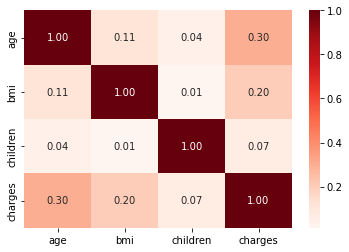

In [11]:
sns.heatmap(matrix_corr, annot=True, cmap="Reds", fmt=".2f")

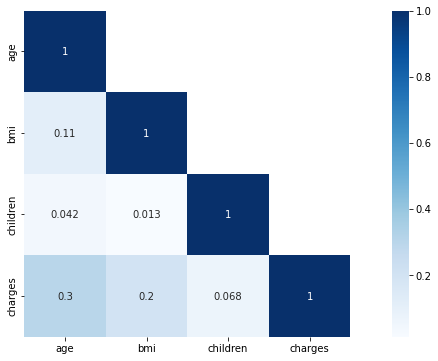

In [12]:
#Corelation matrix.
cor_mat = df1[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.heatmap(data=cor_mat, mask=mask, cmap="Blues",
            square=True, annot=True, cbar=True)
plt.show()


In [13]:
df1.head(3)

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.90,0,yes,southwest,16884.9240,remaja akhir,berlebih
1,18,male,33.77,1,no,southeast,1725.5523,remaja akhir,obesitas
2,28,male,33.00,3,no,southeast,4449.4620,dewasa awal,obesitas


## Deskripsi/gambaran umum data secara visual

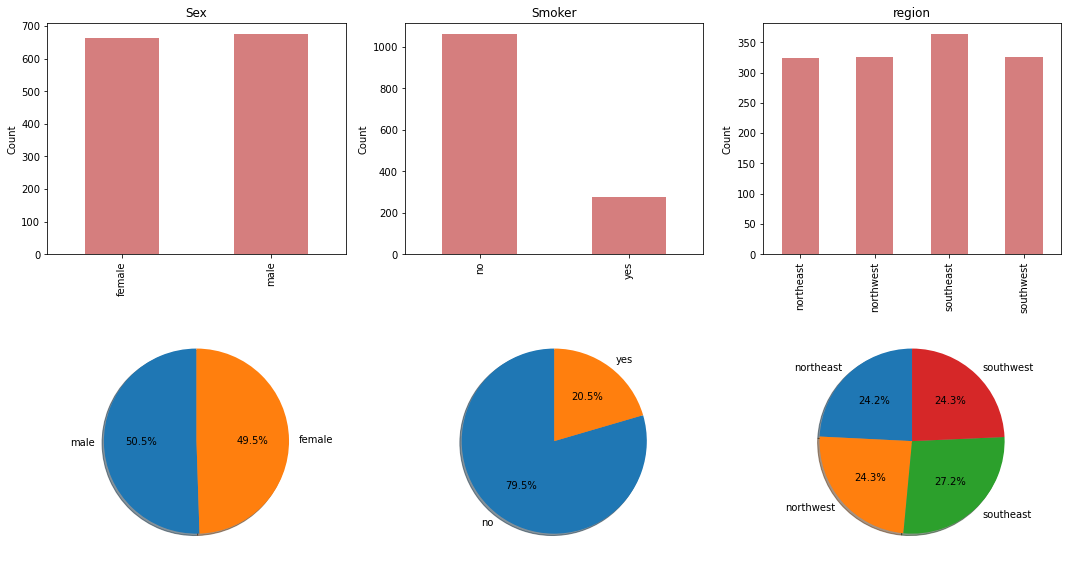

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

#subplot 1
df1['sex'].value_counts().sort_index().plot.bar(ax=ax[0][0], color="#D57E7E")
ax[0][0].set_title('Sex')
ax[0][0].set_ylabel("Count")

#subplot 2
df1['smoker'].value_counts().sort_index().plot.bar(ax=ax[0][1], color="#D57E7E")
ax[0][1].set_title('Smoker')
ax[0][1].set_ylabel("Count")

#subplot 3
df1['region'].value_counts().sort_index().plot.bar(
    ax=ax[0][2], color="#D57E7E")
ax[0][2].set_title('region')
ax[0][2].set_ylabel("Count")

#subplot 4
ax[1][0].pie(x=df1.sex.value_counts(), labels=["male","female"], autopct='%1.1f%%', shadow=True, startangle=90)

#subplot 5
ax[1][1].pie(x=df1.smoker.value_counts(), labels=["no", "yes"],autopct='%1.1f%%', shadow=True, startangle=90)

#subplot 6
ax[1][2].pie(x=df1.region.value_counts().sort_index(), labels=["northeast","northwest","southeast","southwest"], autopct='%1.1f%%', shadow=True, startangle=90)

plt.tight_layout(pad=1.3)
plt.show()


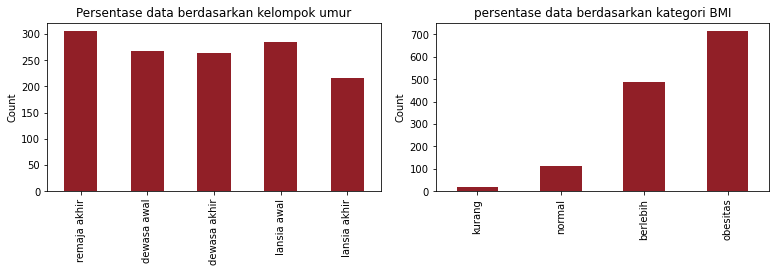

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

#subplot 1
df1['age_group'].value_counts().sort_index().plot.bar(ax=ax[0], color="#911F27")
ax[0].set_title('Persentase data berdasarkan kelompok umur')
ax[0].set_ylabel("Count")

#subplot 2
df1['bmi_group'].value_counts().sort_index().plot.bar(ax=ax[1], color="#911F27")
ax[1].set_title('persentase data berdasarkan kategori BMI')
ax[1].set_ylabel("Count")

plt.tight_layout(pad=1.5)
plt.show()


Berdasarkan data diatas:
- atribut kelompok umur memiliki sebaran data yang sedikit bervariasi dimana data paling banyak dikategorikan dalam golongan "remaja akhir"
- atribut bmi group memiliki pola kecenderungan. dimana data pengguna asuransi mayoritas diisi oleh orang dengan body mass index kategori "berlebih dan "obesitas"


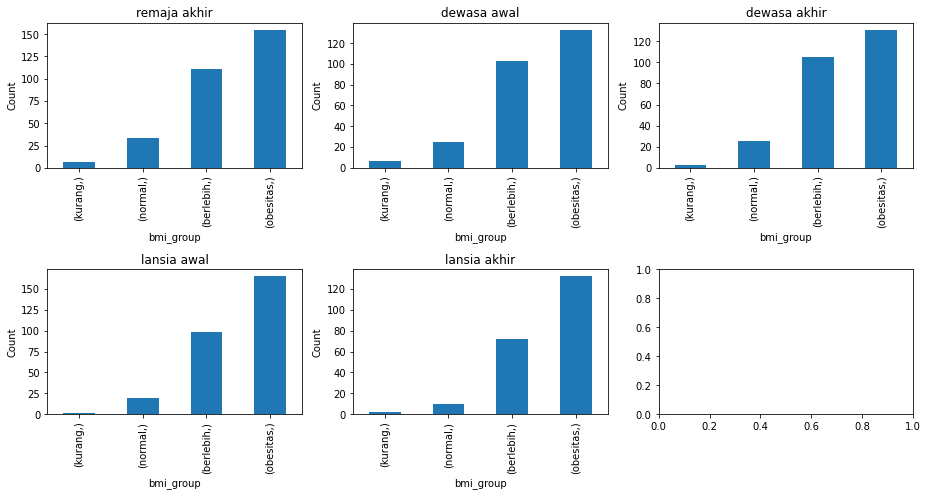

In [16]:
#visualisasi kategori BMI di tiap kategori umur
fig, ax = plt.subplots(2, 3, figsize=(13, 7))

#subplot 1
df1.loc[df1['age_group'] == "remaja akhir", ['bmi_group']].value_counts().sort_index().plot.bar(ax=ax[0][0])
ax[0][0].set_title('remaja akhir')
ax[0][0].set_ylabel("Count")

#subplot 2
df1.loc[df1['age_group'] == "dewasa awal", ['bmi_group']].value_counts().sort_index().plot.bar(ax=ax[0][1])
ax[0][1].set_title('dewasa awal')
ax[0][1].set_ylabel("Count")

#subplot 3
df1.loc[df1['age_group'] == "dewasa akhir", ['bmi_group']].value_counts().sort_index().plot.bar(ax=ax[0][2])
ax[0][2].set_title('dewasa akhir')
ax[0][2].set_ylabel("Count")

#subplot 4
df1.loc[df1['age_group'] == "lansia awal", ['bmi_group']].value_counts().sort_index().plot.bar(ax=ax[1][0])
ax[1][0].set_title('lansia awal')
ax[1][0].set_ylabel("Count")

#subplot 5
df1.loc[df1['age_group'] == "lansia akhir", ['bmi_group']].value_counts().sort_index().plot.bar(ax=ax[1][1])
ax[1][1].set_title('lansia akhir')
ax[1][1].set_ylabel("Count")



plt.tight_layout(pad=1.1)



- Dengan menggabungkan 2 atribut (bmi group dan age group) didapatkan bahwa memang di setiap kategori umur yang dominan adalah orang yang  tergolong kategori BMI "berlebih" dan "obesitas"
- dari hasil penjabaran visual diatas, semakin memperkuat argumen awal bahwa variabel BMI dan BMI group memiliki "pattern" yang terlihat jelas dan akan memiliki andil penting dalam proses pemodelan ML nantinya


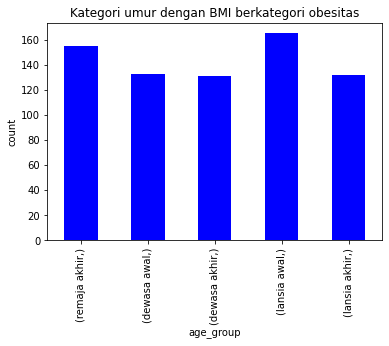

In [17]:
# obesitas berdasarkan kategori umur
df1.loc[df1['bmi_group'] == "obesitas", ['age_group']].value_counts().sort_index().plot.bar(color="blue")
plt.title("Kategori umur dengan BMI berkategori obesitas")
plt.ylabel("count")
plt.show()

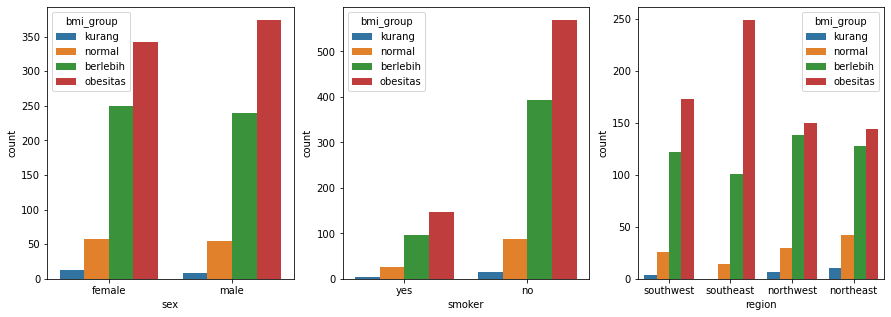

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#subplot 1
sns.countplot(data=df1, x="sex", ax=ax[0], hue="bmi_group")
#subplot 2
sns.countplot(data=df1, x="smoker", ax=ax[1], hue="bmi_group")

#subplot 3
sns.countplot(data=df1, x="region", ax=ax[2], hue="bmi_group")

plt.show()

In [19]:
df1.head(3)

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.90,0,yes,southwest,16884.9240,remaja akhir,berlebih
1,18,male,33.77,1,no,southeast,1725.5523,remaja akhir,obesitas
2,28,male,33.00,3,no,southeast,4449.4620,dewasa awal,obesitas


## Analisis kolom feature dengan kolom target (Charges)

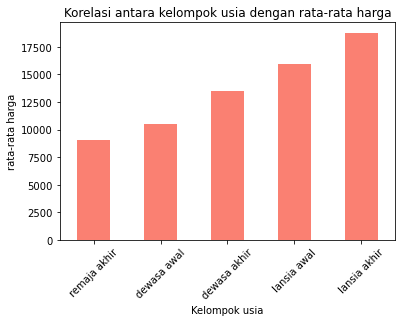

In [20]:
df1_grouped = df1.groupby(['age_group']).mean()
df1_grouped.charges.plot.bar(color="salmon")
plt.xticks(rotation=45)
plt.xlabel("Kelompok usia")
plt.ylabel("rata-rata harga")
plt.title("Korelasi antara kelompok usia dengan rata-rata harga")
plt.show()


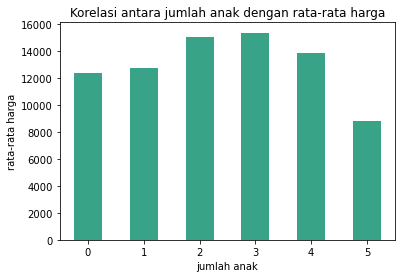

In [21]:
df1_grouped1 = df1.groupby(['children']).mean()
df1_grouped1.charges.plot.bar(color="#39A388")
plt.xticks(rotation=0)
plt.xlabel("jumlah anak")
plt.ylabel("rata-rata harga")
plt.title("Korelasi antara jumlah anak dengan rata-rata harga")
plt.show()

#bentuk non visual
# c1 = df1.loc[df1["children"] == 1, ["charges"]].mean()
# c2 = df1.loc[df1["children"] == 2, ["charges"]].mean()
# c3 = df1.loc[df1["children"] == 3, ["charges"]].mean()

# print("charge asuransi rata2 dengan kondisi memiliki 1 anak: ", c1)
# print("charge asuransi rata2 dengan kondisi memiliki 2 anak: ", c2)
# print("charge asuransi rata2 dengan kondisi memiliki 3 anak: ", c3)


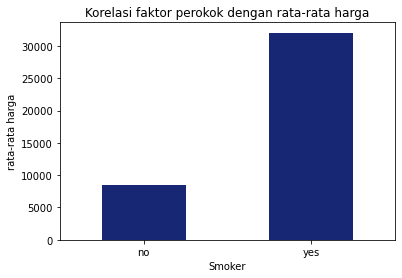

In [22]:
df1_grouped2 = df1.groupby(['smoker']).mean()
df1_grouped2.charges.plot.bar(color="#172774")
plt.xticks(rotation=0)
plt.xlabel("Smoker")
plt.ylabel("rata-rata harga")
plt.title("Korelasi faktor perokok dengan rata-rata harga")
plt.show()


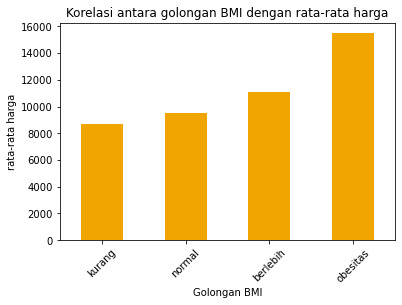

In [23]:
df1_grouped3 = df1.groupby(['bmi_group']).mean()
df1_grouped3.charges.plot.bar(color="#F0A500")
plt.xticks(rotation=45)
plt.xlabel("Golongan BMI")
plt.ylabel("rata-rata harga")
plt.title("Korelasi antara golongan BMI dengan rata-rata harga")
plt.show()


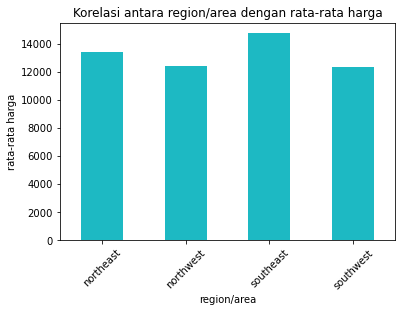

In [24]:
df1_grouped4= df1.groupby(['region']).mean()
df1_grouped4.charges.plot.bar(color="#1DB9C3")
plt.xticks(rotation=45)
plt.xlabel("region/area")
plt.ylabel("rata-rata harga")
plt.title("Korelasi antara region/area dengan rata-rata harga")
plt.show()


# <b>Kesimpulan EDA</b>
Hasil EDA dan visualisasi mempermudah melihat data2 yang memiliki pola dan keterikatan antar satu variabel dengan variabel lain, yang sangat berguna dalam meningkatkan performa model. kesimpulan nya antara lain:
- diperlukan pengelompokan umur dan BMI untuk mempermudah melihat korelasinya dengan feature dan target variabel
- kolom *"sex"* memiliki sebaran nilai yang merata antara "male" dan "female", namun tidak memiliki pola apabila dikaitkan dengan kolom lain
- kolom *"smoker"* memiliki pola yang terlihat jelas jika dibandingkan dengan variabel target *"charges"*, dimana perokok cenderung membayar charge <b>lebih mahal</b>, akan tetapi kebanyakan yang tergolong obesitas berasal dari kalangan non perokok
- kolom *"region"* tidak memiliki pola jika dibandingkan dengan kolom *"charges"*
- kolom *"age_group"* memiliki korelasi dengan kolom *"charges"* dimana semakin tua golongan umur, semakin membayar mahal charge nya
- kolom *"bmi_group"* memiliki korelasi dengan kolom *"charges"* dimana semakin mengarah ke obesitas, charge nya akan semakin tinggi
- kolom *"children"*  memiliki sedikit pola jika dibandingkan dengan varabel target/ *"charges"*

sampai tahap ini, kolom:
- age
- bmi
- smoker
- charges 
- age group
- bmi group

memiliki pola, dan cocok digunakan dalam modelling.

In [25]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,remaja akhir,berlebih
1,18,male,33.770,1,no,southeast,1725.55230,remaja akhir,obesitas
2,28,male,33.000,3,no,southeast,4449.46200,dewasa awal,obesitas
3,33,male,22.705,0,no,northwest,21984.47061,dewasa awal,normal
4,32,male,28.880,0,no,northwest,3866.85520,dewasa awal,berlebih


## Checking and handling outlier

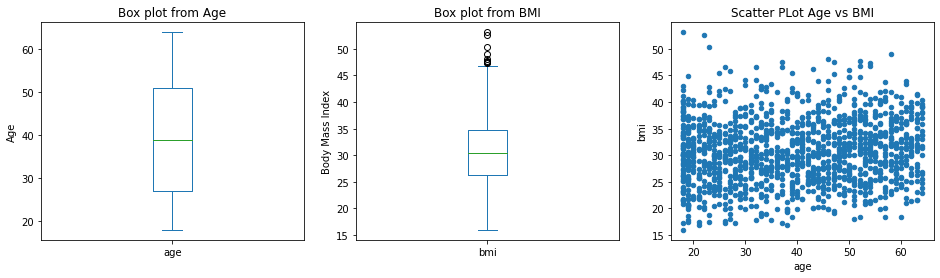

In [26]:
#outlier detection
f, ax = plt.subplots(1, 3, figsize=(16, 4))

df1.age.plot.box(ax=ax[0])
ax[0].set_ylabel('Age')
ax[0].set_title("Box plot from Age")

df1.bmi.plot.box(ax=ax[1])
ax[1].set_ylabel('Body Mass Index')
ax[1].set_title("Box plot from BMI")

df1.plot.scatter(x='age', y='bmi', ax=ax[2])
ax[2].set_title("Scatter PLot Age vs BMI")

plt.show()


Text(0.5, 1.0, 'BMI')

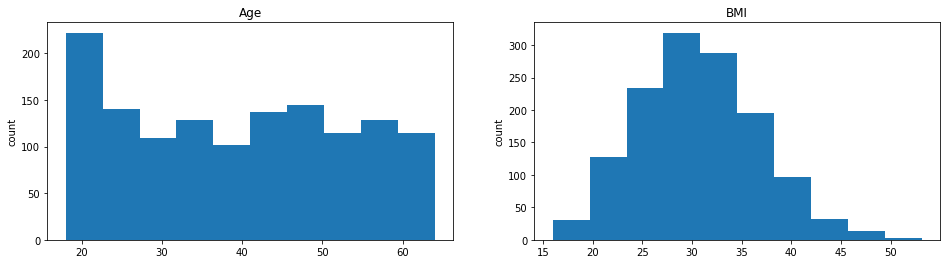

In [27]:
#histogram
f, ax = plt.subplots(1, 2, figsize=(16, 4))

df1.age.plot.hist(ax=ax[0])
ax[0].set_ylabel('count')
ax[0].set_title("Age")

df1.bmi.plot.hist(ax=ax[1])
ax[1].set_ylabel('count')
ax[1].set_title("BMI")


In [28]:
#menghitung IQR (interquartile range)
q1 = df1.bmi.quantile(0.25)
q3 = df1.bmi.quantile(0.75)

iqr = q3-q1

#mengkitung nilai batas bawah dan batas atas
iqr_lower = q1 - 1.5*iqr
iqr_upper = q3 + 1.5*iqr

#Print nilai
print(iqr_lower, iqr_upper)


13.7 47.290000000000006


In [29]:
outlier_atas = df1.loc[df1["bmi"] > iqr_upper, :]
outlier_atas


,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
116,58,male,49.06,0,no,southeast,11381.32540,lansia akhir,obesitas
286,46,female,48.07,2,no,northeast,9432.92530,lansia awal,obesitas
401,47,male,47.52,1,no,southeast,8083.91980,lansia awal,obesitas
543,54,female,47.41,0,yes,southeast,63770.42801,lansia awal,obesitas
847,23,male,50.38,1,no,southeast,2438.05520,remaja akhir,obesitas
860,37,female,47.60,2,yes,southwest,46113.51100,dewasa akhir,obesitas
1047,22,male,52.58,1,yes,southeast,44501.39820,remaja akhir,obesitas
1088,52,male,47.74,1,no,southeast,9748.91060,lansia awal,obesitas
1317,18,male,53.13,0,no,southeast,1163.46270,remaja akhir,obesitas


Data diatas merupakan data outliar yang dapat mempengaruhi performa pemodelan ML, sehingga perlu di handle, ada berbagai cara yang dapat dilakukan untuk mengatasi outlier, cara yang akan dilakukan kali ini adalah dengan memasukkan nilai rata2 (mean) dari BMI

In [30]:
#tahap pertama ganti outlier dengan nilai NA sehingga menjadi missing value
df1["bmi_iqr"] = df1["bmi"]
df1.loc[df1["bmi_iqr"] < iqr_lower, ["bmi_iqr","bmi_group"]] = pd.NA
df1.loc[df1["bmi_iqr"] > iqr_upper, ["bmi_iqr","bmi_group"]] = pd.NA




In [31]:
df1.loc[df1["bmi"] > iqr_upper, :]


,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,bmi_iqr
116,58,male,49.06,0,no,southeast,11381.32540,lansia akhir,NaN,<NA>
286,46,female,48.07,2,no,northeast,9432.92530,lansia awal,NaN,<NA>
401,47,male,47.52,1,no,southeast,8083.91980,lansia awal,NaN,<NA>
543,54,female,47.41,0,yes,southeast,63770.42801,lansia awal,NaN,<NA>
847,23,male,50.38,1,no,southeast,2438.05520,remaja akhir,NaN,<NA>
860,37,female,47.60,2,yes,southwest,46113.51100,dewasa akhir,NaN,<NA>
1047,22,male,52.58,1,yes,southeast,44501.39820,remaja akhir,NaN,<NA>
1088,52,male,47.74,1,no,southeast,9748.91060,lansia awal,NaN,<NA>
1317,18,male,53.13,0,no,southeast,1163.46270,remaja akhir,NaN,<NA>


In [32]:
df1.bmi.mean()

30.663396860986538

In [33]:
df1.bmi_iqr.mean()

30.53734762979683

## Note
nilai <b>30.53734762979683</b> yang merupakan nilai rata-rata akan dimasukkan ke dalam bmi_iqr yang bernilai NA, dan karena nilai <b>30.53734762979683</b> masuk kategori <b>*"berlebih"*</b>, maka akan diinputkan juga ke dalam variabel bmi_group

In [34]:
df1.bmi_iqr.fillna(30.53734762979683, inplace=True)


In [35]:
df1.bmi_group.fillna("berlebih", inplace=True)


In [36]:
df1.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
age_group    0
bmi_group    0
bmi_iqr      0
dtype: int64

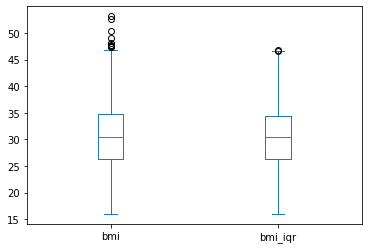

In [37]:
df1[["bmi","bmi_iqr"]].plot.box()
plt.show()

In [38]:
#cek skewwnes setelah handling outlier
df1[["bmi","bmi_iqr"]].skew()

bmi        0.284047
bmi_iqr    0.157710
dtype: float64

Setelah nilai outlier di handle, hasil nilai "skew" dari data bmi pun mengalami peningkatan(semakin mendekati nol)

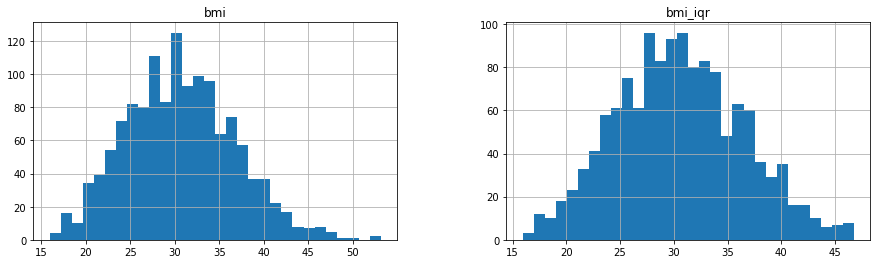

In [39]:
df1[["bmi", "bmi_iqr"]].hist(bins=30, figsize=(15,4))
plt.show()


Dari visualisasi diatas, dapat dilihat bahwa handling outlier dengan metode mean telah berhasil memperbaiki skewness/ kemiringan data pada kolom BMI. hasil yang diperoleh cukup memuaskan dan nilai bmi_iqr siap digunakan di tahap pemodelan

In [40]:
df1.loc[df1["bmi_iqr"] == 30.53734762979683,: ]


,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,bmi_iqr
116,58,male,49.06,0,no,southeast,11381.32540,lansia akhir,berlebih,30.537348
286,46,female,48.07,2,no,northeast,9432.92530,lansia awal,berlebih,30.537348
401,47,male,47.52,1,no,southeast,8083.91980,lansia awal,berlebih,30.537348
543,54,female,47.41,0,yes,southeast,63770.42801,lansia awal,berlebih,30.537348
847,23,male,50.38,1,no,southeast,2438.05520,remaja akhir,berlebih,30.537348
860,37,female,47.60,2,yes,southwest,46113.51100,dewasa akhir,berlebih,30.537348
1047,22,male,52.58,1,yes,southeast,44501.39820,remaja akhir,berlebih,30.537348
1088,52,male,47.74,1,no,southeast,9748.91060,lansia awal,berlebih,30.537348
1317,18,male,53.13,0,no,southeast,1163.46270,remaja akhir,berlebih,30.537348


In [41]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,bmi_iqr
0,19,female,27.900,0,yes,southwest,16884.92400,remaja akhir,berlebih,27.900
1,18,male,33.770,1,no,southeast,1725.55230,remaja akhir,obesitas,33.770
2,28,male,33.000,3,no,southeast,4449.46200,dewasa awal,obesitas,33.000
3,33,male,22.705,0,no,northwest,21984.47061,dewasa awal,normal,22.705
4,32,male,28.880,0,no,northwest,3866.85520,dewasa awal,berlebih,28.880


In [42]:
from sklearn.preprocessing import OneHotEncoder
#inisiasi encoder
ohc = OneHotEncoder(handle_unknown="ignore")

#fit dan transform
new_features = ohc.fit_transform(df1[["children"]])

#masukkan ke dataframe dan hasilnya
cols_name = [x for x in df1["children"].unique()]
df_children_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_children_ohc.sample(3)


,0,1,3,2,5,4
1312,0.0,1.0,0.0,0.0,0.0,0.0
1275,1.0,0.0,0.0,0.0,0.0,0.0
575,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#fit dan transform
new_features = ohc.fit_transform(df1[["smoker"]])

#masukkan ke dataframe dan hasilnya
cols_name = [x for x in df1["smoker"].unique()]
df_smoker_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_smoker_ohc.sample(3)


,yes,no
386,1.0,0.0
919,1.0,0.0
1083,1.0,0.0


In [44]:
#fit dan transform
new_features = ohc.fit_transform(df1[["age_group"]])

#masukkan ke dataframe dan hasilnya
cols_name = [x for x in df1["age_group"].unique()]
df_age_group_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_age_group_ohc.sample(3)


,remaja akhir,dewasa awal,lansia awal,dewasa akhir,lansia akhir
772,1.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,1.0
1296,0.0,0.0,0.0,0.0,1.0


In [45]:
#fit dan transform
new_features = ohc.fit_transform(df1[["bmi_group"]])

#masukkan ke dataframe dan hasilnya
cols_name = [x for x in df1["bmi_group"].unique()]
df_bmi_group_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_bmi_group_ohc.sample(3)


,berlebih,obesitas,normal,kurang
421,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
217,1.0,0.0,0.0,0.0


In [46]:
#gabung ke dataset utama
df1 = pd.concat([df1, df_children_ohc, df_smoker_ohc, df_age_group_ohc, df_bmi_group_ohc], axis=1)


In [48]:
df1.head(5)

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,bmi_iqr,...,no,remaja akhir,dewasa awal,lansia awal,dewasa akhir,lansia akhir,berlebih,obesitas,normal,kurang
0,19,female,27.900,0,yes,southwest,16884.92400,remaja akhir,berlebih,27.900,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,18,male,33.770,1,no,southeast,1725.55230,remaja akhir,obesitas,33.770,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,dewasa awal,obesitas,33.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,dewasa awal,normal,22.705,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,dewasa awal,berlebih,28.880,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## kesimpulan
- sampai tahap ini, proses data preparation sudah selesai, dan siap di lakukan proses pemilihan model *Machine Learning*
- setelah dilakukan pemodelan, nantinya tidak menutup kemungkinan akan dilakukan proses data preparation ulang, untuk mereview dan meng optimasi hasil model yang mungkin dirasa kurang, sebelum masuk ke dalam proses production